# ESC-50 Dataset Loading and Analysis

This notebook demonstrates how to load and analyze the ESC-50 dataset for environmental sound classification. It provides:
- Dataset integrity verification
- Class distribution analysis
- Audio sample visualization and playback
- Waveform and spectrogram visualization

## Prerequisites

Before running this notebook, ensure that:
1. The ESC-50 dataset is downloaded and extracted
2. The `ESC_50_dataset` environment variable points to the dataset root directory
3. The dataset structure follows: `<ESC_50_dataset>/audio/` for audio files and `<ESC_50_dataset>/meta/esc50.csv` for metadata

## Setup and Imports

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, display

# AFX imports
from AFX.io.io import load_audio
from AFX.utils.config_loader import load_config
from AFX.extract_all import extract_all_features
from AFX.utils.visualization import plot_mfcc, plot_spectrogram

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✓ All imports successful")

✓ All imports successful


## Dataset Setup and Verification

In [2]:
# Check for ESC-50 dataset environment variable
DATASET_PATH = os.getenv('ESC_50_dataset')

if DATASET_PATH is None:
    print("❌ ESC_50_dataset environment variable is not set!")
    print("Please set it to point to your ESC-50 dataset root directory.")
    print("Example: export ESC_50_dataset=/path/to/ESC-50-master")
    sys.exit(1)
else:
    print(f"✓ ESC_50_dataset environment variable set to: {DATASET_PATH}")
    
# Verify dataset structure
audio_path = os.path.join(DATASET_PATH, 'audio')
metadata_path = os.path.join(DATASET_PATH, 'meta', 'esc50.csv')
config_path = os.path.join('config.json')

print("\n📁 Dataset Structure Verification:")
print(f"Audio directory: {audio_path} - {'✓ exists' if os.path.exists(audio_path) else '❌ missing'}")
print(f"Metadata file: {metadata_path} - {'✓ exists' if os.path.exists(metadata_path) else '❌ missing'}")
print(f"Config file: {config_path} - {'✓ exists' if os.path.exists(config_path) else '❌ missing'}")

if not all([os.path.exists(audio_path), os.path.exists(metadata_path), os.path.exists(config_path)]):
    print("\n❌ Dataset structure verification failed!")
    print("Please ensure the ESC-50 dataset is properly extracted and the path is correct.")
else:
    print("\n✓ Dataset structure verification passed!")

✓ ESC_50_dataset environment variable set to: D:\datasets\ESC-50-master

📁 Dataset Structure Verification:
Audio directory: D:\datasets\ESC-50-master\audio - ✓ exists
Metadata file: D:\datasets\ESC-50-master\meta\esc50.csv - ✓ exists
Config file: config.json - ✓ exists

✓ Dataset structure verification passed!


## Load and Explore Metadata

In [3]:
# Load ESC-50 metadata
try:
    metadata = pd.read_csv(metadata_path)
    print(f"✓ Successfully loaded metadata with {len(metadata)} samples")
    print(f"\n📊 Dataset Overview:")
    print(f"Total samples: {len(metadata)}")
    print(f"Number of classes: {metadata['category'].nunique()}")
    print(f"Number of folds: {metadata['fold'].nunique()}")
    print(f"Audio files expected: {len(metadata)}")
    
    # Display first few rows
    print("\n📋 First 5 samples:")
    display(metadata.head())
    
except Exception as e:
    print(f"❌ Error loading metadata: {e}")
    sys.exit(1)

✓ Successfully loaded metadata with 2000 samples

📊 Dataset Overview:
Total samples: 2000
Number of classes: 50
Number of folds: 5
Audio files expected: 2000

📋 First 5 samples:


,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [4]:
# Get detailed information about the dataset
print("📋 Dataset Column Information:")
print(metadata.info())

print("\n📊 Dataset Statistics:")
print(metadata.describe(include='all'))

📋 Dataset Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB
None

📊 Dataset Statistics:
                filename         fold       target category  esc10  \
count               2000  2000.000000  2000.000000     2000   2000   
unique              2000          NaN          NaN       50      2   
top     1-100032-A-0.wav          NaN          NaN      dog  False   
freq                   1          NaN          NaN       40   1600   
mean                 NaN     3.000000    24.500000      NaN    NaN   
std           

## Class Distribution Analysis

In [5]:
# Analyze class distribution
class_counts = metadata['category'].value_counts().sort_index()
print(f"📊 Class Distribution:")
print(f"Total classes: {len(class_counts)}")
print(f"Samples per class (expected): 40")
print(f"Samples per class (actual): {class_counts.min()} - {class_counts.max()}")

# Check if dataset is balanced
is_balanced = len(set(class_counts.values)) == 1
print(f"Dataset balanced: {'✓ Yes' if is_balanced else '❌ No'}")

print("\n📋 Class counts:")
for category, count in class_counts.items():
    print(f"{category}: {count} samples")

📊 Class Distribution:
Total classes: 50
Samples per class (expected): 40
Samples per class (actual): 40 - 40
Dataset balanced: ✓ Yes

📋 Class counts:
airplane: 40 samples
breathing: 40 samples
brushing_teeth: 40 samples
can_opening: 40 samples
car_horn: 40 samples
cat: 40 samples
chainsaw: 40 samples
chirping_birds: 40 samples
church_bells: 40 samples
clapping: 40 samples
clock_alarm: 40 samples
clock_tick: 40 samples
coughing: 40 samples
cow: 40 samples
crackling_fire: 40 samples
crickets: 40 samples
crow: 40 samples
crying_baby: 40 samples
dog: 40 samples
door_wood_creaks: 40 samples
door_wood_knock: 40 samples
drinking_sipping: 40 samples
engine: 40 samples
fireworks: 40 samples
footsteps: 40 samples
frog: 40 samples
glass_breaking: 40 samples
hand_saw: 40 samples
helicopter: 40 samples
hen: 40 samples
insects: 40 samples
keyboard_typing: 40 samples
laughing: 40 samples
mouse_click: 40 samples
pig: 40 samples
pouring_water: 40 samples
rain: 40 samples
rooster: 40 samples
sea_waves: 

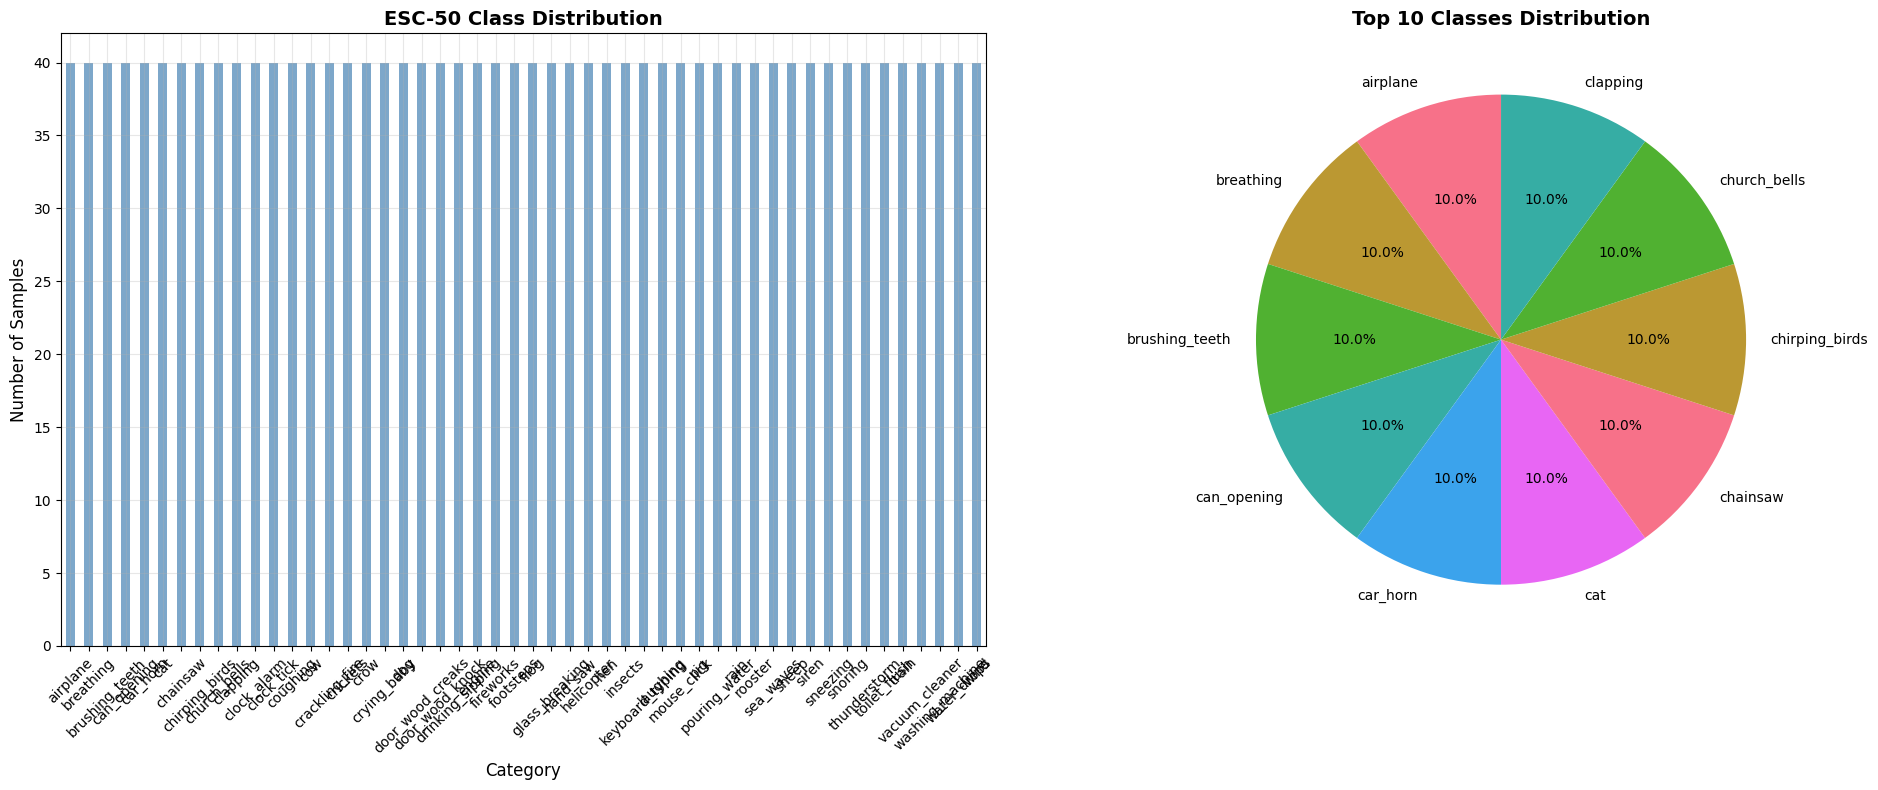


✓ Visualization shows balanced distribution across 50 classes


In [6]:
# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot
class_counts.plot(kind='bar', ax=ax1, color='steelblue', alpha=0.7)
ax1.set_title('ESC-50 Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Pie chart (showing a subset for readability)
top_10_classes = class_counts.head(10)
ax2.pie(top_10_classes.values, labels=top_10_classes.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Top 10 Classes Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Visualization shows {'balanced' if is_balanced else 'imbalanced'} distribution across {len(class_counts)} classes")

## Fold Distribution Analysis

📊 Fold Distribution:
Total folds: 5
Samples per fold: 400 - 400


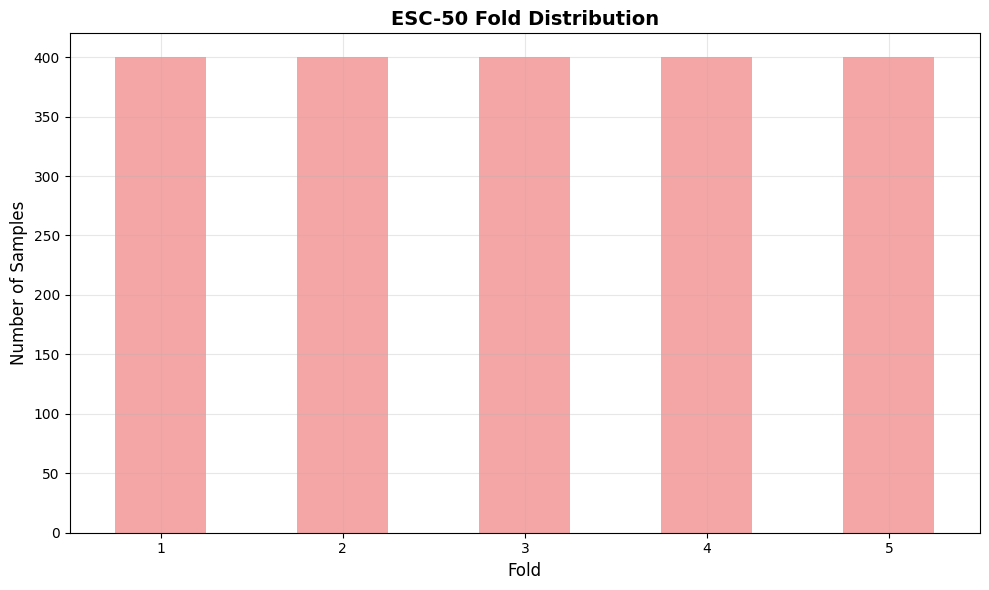


📋 Category-Fold Cross-tabulation (first 10 categories):


fold,1,2,3,4,5
category,,,,,
airplane,8,8,8,8,8
breathing,8,8,8,8,8
brushing_teeth,8,8,8,8,8
can_opening,8,8,8,8,8
car_horn,8,8,8,8,8
cat,8,8,8,8,8
chainsaw,8,8,8,8,8
chirping_birds,8,8,8,8,8
church_bells,8,8,8,8,8


In [7]:
# Analyze fold distribution
fold_counts = metadata['fold'].value_counts().sort_index()
print(f"📊 Fold Distribution:")
print(f"Total folds: {len(fold_counts)}")
print(f"Samples per fold: {fold_counts.min()} - {fold_counts.max()}")

# Visualize fold distribution
plt.figure(figsize=(10, 6))
fold_counts.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('ESC-50 Fold Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Cross-tabulation of categories and folds
cross_tab = pd.crosstab(metadata['category'], metadata['fold'])
print("\n📋 Category-Fold Cross-tabulation (first 10 categories):")
display(cross_tab.head(10))

## Audio File Verification

In [8]:
# Check if all audio files exist
missing_files = []
existing_files = []

print("🔍 Verifying audio files...")
for filename in metadata['filename']:
    file_path = os.path.join(audio_path, filename)
    if os.path.exists(file_path):
        existing_files.append(filename)
    else:
        missing_files.append(filename)

print(f"✓ Found {len(existing_files)} audio files")
if missing_files:
    print(f"❌ Missing {len(missing_files)} audio files:")
    for missing in missing_files[:10]:  # Show first 10 missing files
        print(f"  - {missing}")
    if len(missing_files) > 10:
        print(f"  ... and {len(missing_files) - 10} more")
else:
    print("✓ All audio files found!")

# Update metadata to only include existing files
if missing_files:
    metadata = metadata[metadata['filename'].isin(existing_files)]
    print(f"📊 Updated dataset size: {len(metadata)} samples")

🔍 Verifying audio files...
✓ Found 2000 audio files
✓ All audio files found!


## Load AFX Configuration

In [9]:
# Load AFX configuration
try:
    config = load_config(config_path)
    print(f"✓ Successfully loaded AFX configuration")
    print(f"Sample rate: {config['sample_rate']} Hz")
    print(f"Features configured: {len(config['features'])}")
    print(f"Aggregation method: {config['aggregation']}")
    
    # Display available features
    print("\n🎵 Available features:")
    for feature in config['features'].keys():
        print(f"  - {feature}")
        
except Exception as e:
    print(f"❌ Error loading configuration: {e}")
    sys.exit(1)

✓ Successfully loaded AFX configuration
Sample rate: 22050 Hz
Features configured: 30
Aggregation method: mean

🎵 Available features:
  - zcr
  - variance
  - kurtosis
  - autocorr_variance
  - mobility
  - complexity
  - sample_entropy
  - energy_ratio
  - short_time_energy
  - rms_energy
  - spectral_centroid
  - spectral_bandwidth
  - spectral_rolloff
  - spectral_contrast
  - spectral_entropy
  - spectral_flatness
  - spectral_flux
  - spectral_skewness
  - spectral_slope
  - melspectrogram
  - mfcc
  - mfcc_delta
  - mfcc_delta_delta
  - chroma_stft
  - chroma_cqt
  - cqt
  - pitch
  - thd
  - hnr
  - gfcc


## Sample Audio Loading and Analysis

In [10]:
# Select one sample from each class for demonstration
sample_per_class = metadata.groupby('category').first().reset_index()
print(f"📋 Selected {len(sample_per_class)} samples (one per class):")

# Display selected samples
display(sample_per_class[['filename', 'category', 'fold', 'target', 'esc10', 'src_file', 'take']].head(10))

📋 Selected 50 samples (one per class):


,filename,category,fold,target,esc10,src_file,take
0,1-11687-A-47.wav,airplane,1,47,False,11687,A
1,1-18631-A-23.wav,breathing,1,23,False,18631,A
2,1-17092-A-27.wav,brushing_teeth,1,27,False,17092,A
3,1-101404-A-34.wav,can_opening,1,34,False,101404,A
4,1-17124-A-43.wav,car_horn,1,43,False,17124,A
5,1-34094-A-5.wav,cat,1,5,False,34094,A
6,1-116765-A-41.wav,chainsaw,1,41,True,116765,A
7,1-100038-A-14.wav,chirping_birds,1,14,False,100038,A
8,1-13571-A-46.wav,church_bells,1,46,False,13571,A
9,1-104089-A-22.wav,clapping,1,22,False,104089,A


## Audio Playback Examples

In [11]:
# Function to display audio with metadata
def display_audio_sample(row, audio_path, config):
    """Display audio sample with metadata and playback controls."""
    filename = row['filename']
    category = row['category']
    file_path = os.path.join(audio_path, filename)
    
    try:
        # Load audio
        signal, sr = load_audio(file_path, sr=config['sample_rate'])
        
        # Display metadata
        print(f"🎵 Category: {category}")
        print(f"📁 Filename: {filename}")
        print(f"⏱️  Duration: {len(signal)/sr:.2f} seconds")
        print(f"🔊 Sample rate: {sr} Hz")
        print(f"📊 Signal shape: {signal.shape}")
        
        # Display audio player
        display(Audio(signal, rate=sr))
        
        return signal, sr
        
    except Exception as e:
        print(f"❌ Error loading {filename}: {e}")
        return None, None

# Display first 5 samples with audio playback
print("🎵 Audio Playback Examples (First 5 Classes):")
print("=" * 50)

for i, (_, row) in enumerate(sample_per_class.head(5).iterrows()):
    print(f"\n📀 Sample {i+1}/{min(5, len(sample_per_class))}:")
    signal, sr = display_audio_sample(row, audio_path, config)
    print("-" * 30)

🎵 Audio Playback Examples (First 5 Classes):

📀 Sample 1/5:
🎵 Category: airplane
📁 Filename: 1-11687-A-47.wav
⏱️  Duration: 5.00 seconds
🔊 Sample rate: 22050 Hz
📊 Signal shape: (110250,)


------------------------------

📀 Sample 2/5:
🎵 Category: breathing
📁 Filename: 1-18631-A-23.wav
⏱️  Duration: 5.00 seconds
🔊 Sample rate: 22050 Hz
📊 Signal shape: (110250,)


------------------------------

📀 Sample 3/5:
🎵 Category: brushing_teeth
📁 Filename: 1-17092-A-27.wav
⏱️  Duration: 5.00 seconds
🔊 Sample rate: 22050 Hz
📊 Signal shape: (110250,)


------------------------------

📀 Sample 4/5:
🎵 Category: can_opening
📁 Filename: 1-101404-A-34.wav
⏱️  Duration: 5.00 seconds
🔊 Sample rate: 22050 Hz
📊 Signal shape: (110250,)


------------------------------

📀 Sample 5/5:
🎵 Category: car_horn
📁 Filename: 1-17124-A-43.wav
⏱️  Duration: 5.00 seconds
🔊 Sample rate: 22050 Hz
📊 Signal shape: (110250,)


------------------------------


## Waveform Visualization

📊 Waveform Visualizations:


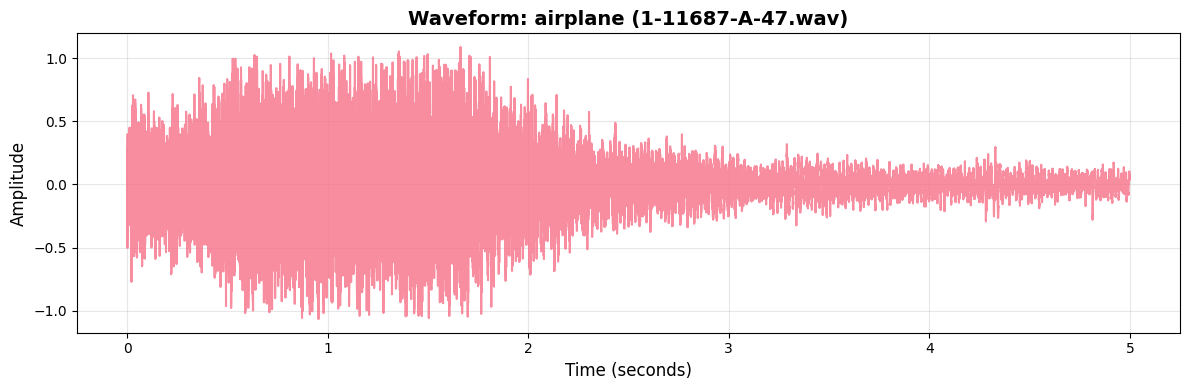

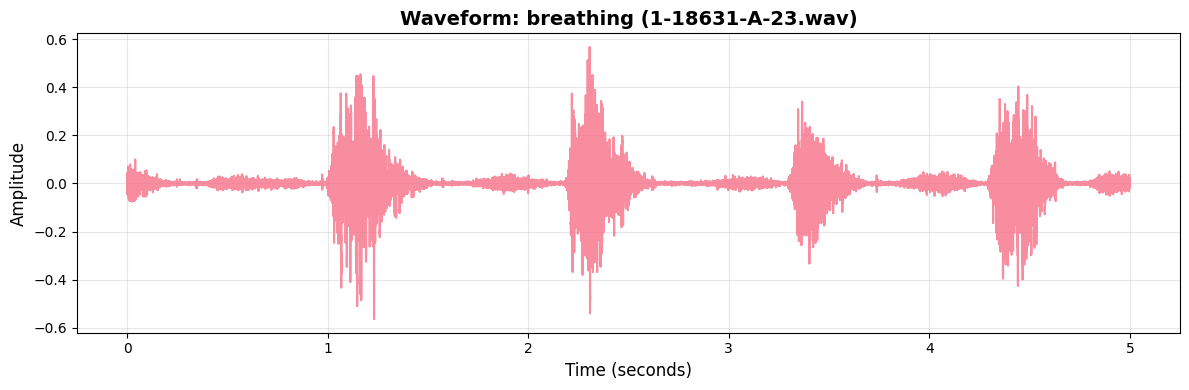

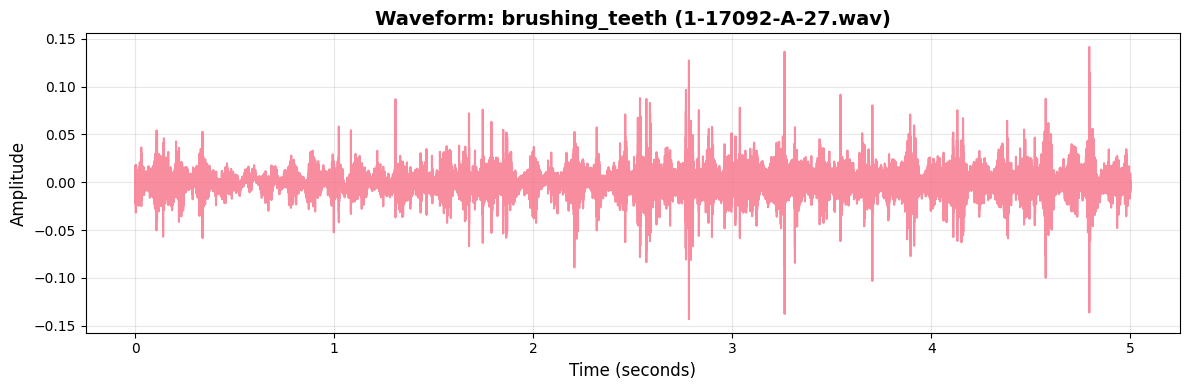

In [12]:
# Function to plot waveform
def plot_waveform(signal, sr, title="Audio Waveform"):
    """Plot audio waveform."""
    plt.figure(figsize=(12, 4))
    time_axis = np.arange(len(signal)) / sr
    plt.plot(time_axis, signal, alpha=0.8)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualize waveforms for first 3 samples
print("📊 Waveform Visualizations:")
print("=" * 40)

for i, (_, row) in enumerate(sample_per_class.head(3).iterrows()):
    filename = row['filename']
    category = row['category']
    file_path = os.path.join(audio_path, filename)
    
    try:
        signal, sr = load_audio(file_path, sr=config['sample_rate'])
        plot_waveform(signal, sr, f"Waveform: {category} ({filename})")
    except Exception as e:
        print(f"❌ Error plotting waveform for {filename}: {e}")

## Spectrogram Visualization

📊 Spectrogram Visualizations:


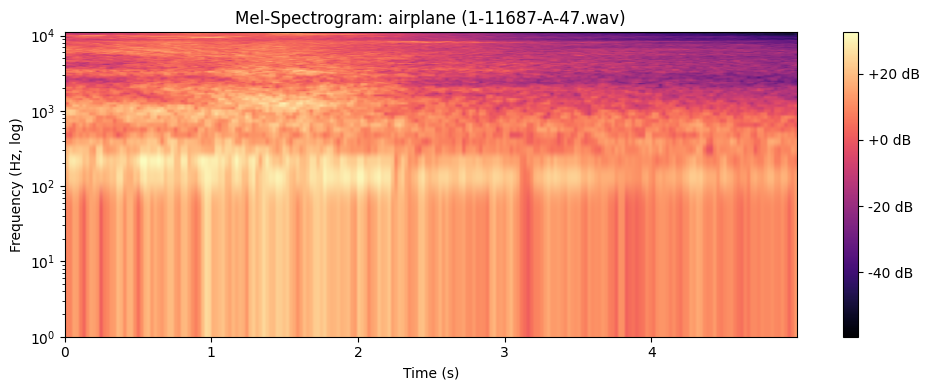

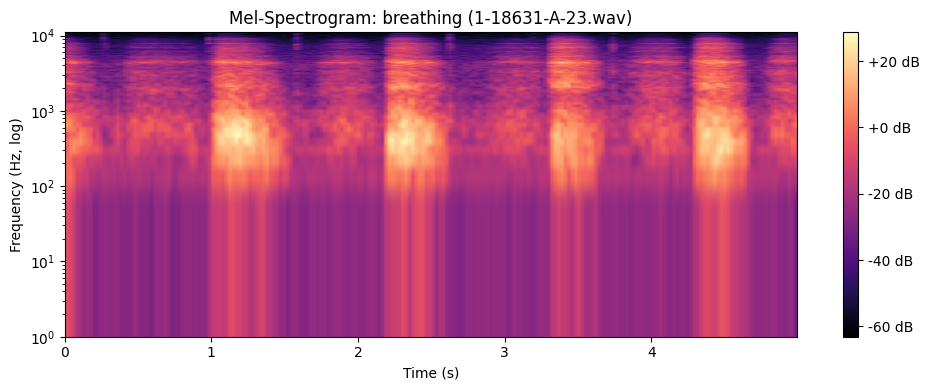

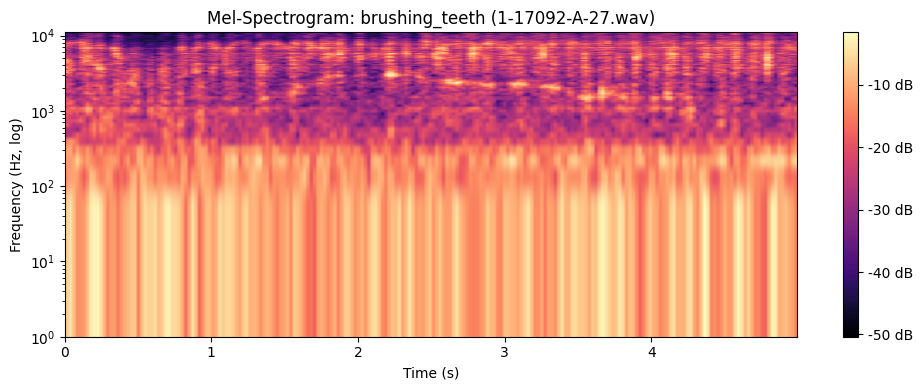

In [13]:
# Extract and visualize spectrograms
print("📊 Spectrogram Visualizations:")
print("=" * 40)

# Configure for visualization
config_with_shape = config.copy()
config_with_shape['preserve_shape'] = True

for i, (_, row) in enumerate(sample_per_class.head(3).iterrows()):
    filename = row['filename']
    category = row['category']
    file_path = os.path.join(audio_path, filename)
    
    try:
        # Load audio
        signal, sr = load_audio(file_path, sr=config['sample_rate'])
        
        # Extract features
        features = extract_all_features(signal, sr, config_with_shape)
        
        # Plot mel-spectrogram if available
        if 'melspectrogram' in features:
            melspectrogram = features['melspectrogram']
            plot_spectrogram(melspectrogram, sr, 
                           title=f"Mel-Spectrogram: {category} ({filename})")
        else:
            print(f"⚠️  Mel-spectrogram not available for {filename}")
            
    except Exception as e:
        print(f"❌ Error generating spectrogram for {filename}: {e}")

## MFCC Visualization

📊 MFCC Visualizations:


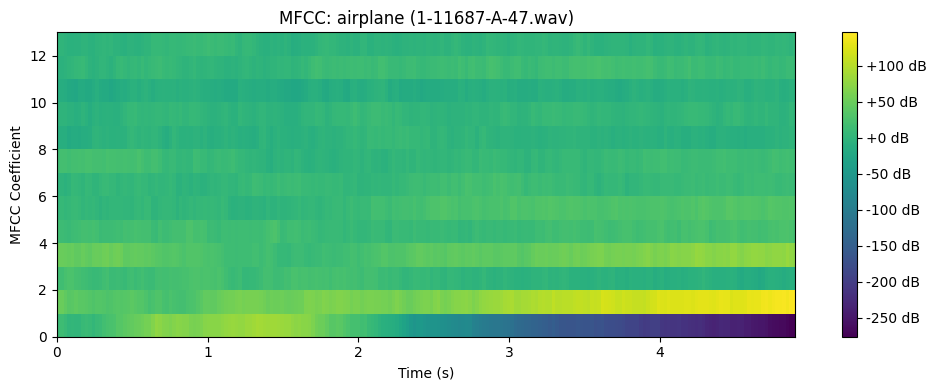

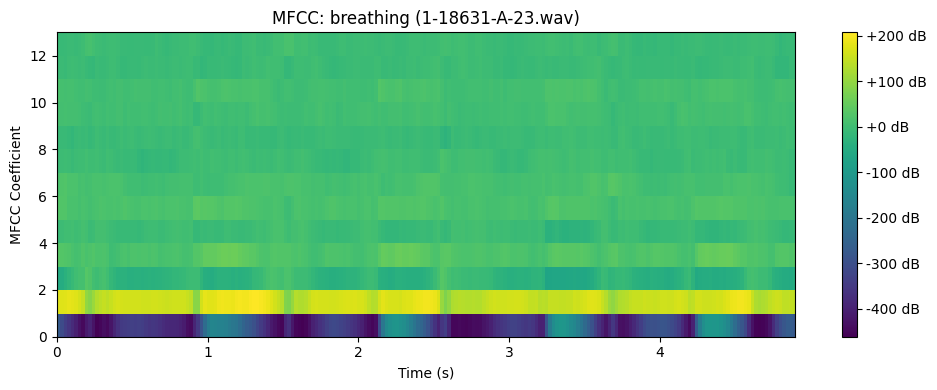

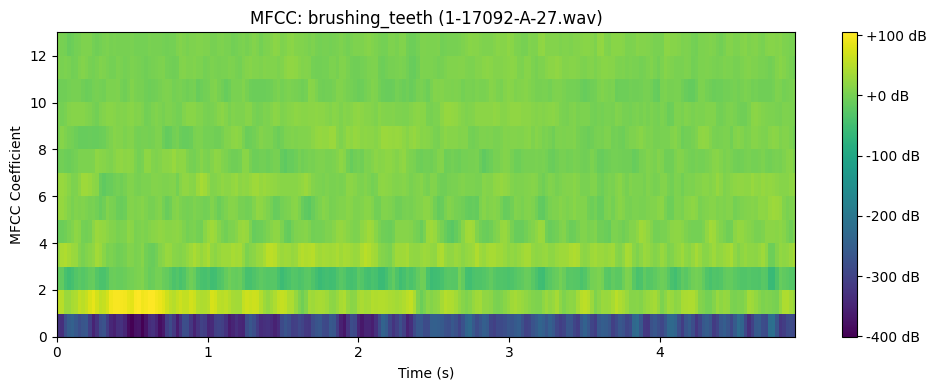

In [14]:
# Extract and visualize MFCCs
print("📊 MFCC Visualizations:")
print("=" * 40)

for i, (_, row) in enumerate(sample_per_class.head(3).iterrows()):
    filename = row['filename']
    category = row['category']
    file_path = os.path.join(audio_path, filename)
    
    try:
        # Load audio
        signal, sr = load_audio(file_path, sr=config['sample_rate'])
        
        # Extract features
        features = extract_all_features(signal, sr, config_with_shape)
        
        # Plot MFCC if available
        if 'mfcc' in features:
            mfcc = features['mfcc']
            # If MFCC is 3D, average over axis 1 to get a 2D array for plotting
            if isinstance(mfcc, np.ndarray) and mfcc.ndim == 3:
                mfcc_plot = np.mean(mfcc, axis=1)
            else:
                mfcc_plot = mfcc
            plot_mfcc(mfcc_plot, sr, title=f"MFCC: {category} ({filename})")
        else:
            print(f"⚠️  MFCC not available for {filename}")
            
    except Exception as e:
        print(f"❌ Error generating MFCC for {filename}: {e}")

## Feature Extraction Overview

In [15]:
# Extract features for a sample to show what's available
sample_row = sample_per_class.iloc[0]
sample_file = os.path.join(audio_path, sample_row['filename'])

try:
    signal, sr = load_audio(sample_file, sr=config['sample_rate'])
    features = extract_all_features(signal, sr, config_with_shape)
    
    print(f"🎵 Feature extraction results for: {sample_row['category']} ({sample_row['filename']})")
    print(f"Audio duration: {len(signal)/sr:.2f} seconds")
    print(f"\n📊 Extracted features:")
    
    for feature_name, feature_data in features.items():
        if isinstance(feature_data, np.ndarray):
            shape_str = f"Shape: {feature_data.shape}"
            if feature_data.ndim == 1:
                stats = f"Mean: {np.mean(feature_data):.3f}, Std: {np.std(feature_data):.3f}"
            else:
                stats = f"Mean: {np.mean(feature_data):.3f}, Std: {np.std(feature_data):.3f}"
            print(f"  ✓ {feature_name}: {shape_str}, {stats}")
        else:
            print(f"  ✓ {feature_name}: {type(feature_data).__name__}")
            
except Exception as e:
    print(f"❌ Error in feature extraction overview: {e}")

🎵 Feature extraction results for: airplane (1-11687-A-47.wav)
Audio duration: 5.00 seconds

📊 Extracted features:
  ✓ zcr: Shape: (212,), Mean: 0.140, Std: 0.098
  ✓ variance: Shape: (1,), Mean: 0.046, Std: 0.000
  ✓ rms_energy: Shape: (1,), Mean: 0.215, Std: 0.000
  ✓ spectral_centroid: Shape: (212,), Mean: 2739.470, Std: 1169.300
  ✓ spectral_bandwidth: Shape: (212,), Mean: 2687.901, Std: 618.784
  ✓ spectral_rolloff: Shape: (212,), Mean: 2322.933, Std: 2537.793
  ✓ spectral_skewness: Shape: (212,), Mean: 1.123, Std: 0.722
  ✓ spectral_slope: Shape: (212,), Mean: -0.002, Std: 0.001
  ✓ melspectrogram: Shape: (128, 216), Mean: 8.775, Std: 51.560
  ✓ mfcc: Shape: (13, 212), Mean: 8.006, Std: 46.922
  ✓ mfcc_delta: Shape: (13, 212), Mean: 0.000, Std: 0.000
  ✓ chroma_cqt: Shape: (12, 212), Mean: 0.083, Std: 0.022
  ✓ pitch: Shape: (212,), Mean: 16.001, Std: 25.669
  ✓ thd: Shape: (1,), Mean: 0.207, Std: 0.000
  ✓ hnr: Shape: (212,), Mean: 11.960, Std: 7.619
  ✓ gfcc: Shape: (13, 212), M

## Dataset Summary and Quality Assessment

In [16]:
# Final dataset summary
print("📋 ESC-50 Dataset Summary")
print("=" * 50)
print(f"✓ Total samples: {len(metadata)}")
print(f"✓ Total classes: {metadata['category'].nunique()}")
print(f"✓ Total folds: {metadata['fold'].nunique()}")
print(f"✓ Audio files found: {len(existing_files)}/{len(metadata) + len(missing_files)}")
print(f"✓ Dataset balanced: {'Yes' if is_balanced else 'No'}")
print(f"✓ Sample rate: {config['sample_rate']} Hz")
print(f"✓ Available features: {len(config['features'])}")

if missing_files:
    print(f"⚠️  Warning: {len(missing_files)} audio files are missing")
    
print("\n🎯 Dataset Quality Assessment:")
quality_score = 0
max_score = 5

# Check various quality metrics
if len(existing_files) == len(metadata) + len(missing_files):
    print("✓ All audio files present")
    quality_score += 1
else:
    print("❌ Some audio files missing")
    
if is_balanced:
    print("✓ Dataset is balanced")
    quality_score += 1
else:
    print("⚠️  Dataset has imbalanced classes")
    
if metadata['category'].nunique() == 50:
    print("✓ Expected number of classes (50)")
    quality_score += 1
else:
    print(f"⚠️  Unexpected number of classes: {metadata['category'].nunique()}")
    
if metadata['fold'].nunique() == 5:
    print("✓ Expected number of folds (5)")
    quality_score += 1
else:
    print(f"⚠️  Unexpected number of folds: {metadata['fold'].nunique()}")
    
if len(metadata) >= 2000:  # ESC-50 should have 2000 samples
    print("✓ Expected dataset size")
    quality_score += 1
else:
    print(f"⚠️  Unexpected dataset size: {len(metadata)}")

print(f"\n🏆 Overall Quality Score: {quality_score}/{max_score}")
if quality_score == max_score:
    print("✨ Excellent! Dataset is ready for analysis.")
elif quality_score >= 3:
    print("👍 Good! Dataset is usable with minor issues.")
else:
    print("⚠️  Dataset has significant issues that should be addressed.")

📋 ESC-50 Dataset Summary
✓ Total samples: 2000
✓ Total classes: 50
✓ Total folds: 5
✓ Audio files found: 2000/2000
✓ Dataset balanced: Yes
✓ Sample rate: 22050 Hz
✓ Available features: 30

🎯 Dataset Quality Assessment:
✓ All audio files present
✓ Dataset is balanced
✓ Expected number of classes (50)
✓ Expected number of folds (5)
✓ Expected dataset size

🏆 Overall Quality Score: 5/5
✨ Excellent! Dataset is ready for analysis.


This notebook has loaded and analyzed the ESC-50 dataset. Here are what you can do next:

### Further Analysis
- **Feature Engineering**: Extract comprehensive audio features for all samples
- **Statistical Analysis**: Perform detailed statistical analysis of audio characteristics per class
- **Exploratory Data Analysis**: Investigate correlations between features and classes

### Machine Learning
- **Baseline Models**: Train simple classification models (SVM, Random Forest)
- **Deep Learning**: Implement CNN/RNN models for audio classification
- **Cross-validation**: Use the provided 5-fold structure for robust evaluation

### Advanced Visualization
- **t-SNE/UMAP**: Visualize high-dimensional audio features
- **Confusion Matrices**: Analyze classification performance per class
- **Feature Importance**: Identify most discriminative features
